Content
This dataset contains over 570k rows of data and 9 columns, explained as follows:

Index column
Department, (departamento): All 32 colombian departments
Municipality, (municipio): Subdivisions of the departments
Codigo_dane: Identification of the case
Gun_type, (armas_medios): Gun that was used to perform the crime
Date, (fecha_hecho): Crime date, yy-mm-dd
Sex, (genero): Victim sex
Age_group, (grupo_etario): Classification of the age group
Quantity of cases, (cantidad): Number of victims

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("raw_data.csv", index_col= 0)
df.head()

C:\Users\wmigu\AppData\Local\Temp\ipykernel_14624\86839347.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("raw_data.csv", index_col= 0)


,departamento,municipio,codigo_dane,armas_medios,fecha_hecho,genero,grupo_etario,cantidad
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575721 entries, 0 to 575720
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   departamento  575721 non-null  object
 1   municipio     575721 non-null  object
 2   codigo_dane   575721 non-null  object
 3   armas_medios  575721 non-null  object
 4   fecha_hecho   575721 non-null  object
 5   genero        575721 non-null  object
 6   grupo_etario  574110 non-null  object
 7   cantidad      575721 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 39.5+ MB


In [4]:
df.describe()

,cantidad
count,575721.000000
mean,1.798076
std,3.912093
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,143.000000


In [5]:
df.isnull().sum()

departamento       0
municipio          0
codigo_dane        0
armas_medios       0
fecha_hecho        0
genero             0
grupo_etario    1611
cantidad           0
dtype: int64

In [6]:
df["grupo_etario"].value_counts()

ADULTOS         503613
ADOLESCENTES     35551
MENORES          34439
NO REPORTA         274
NO REPORTADO       233
Name: grupo_etario, dtype: int64

In [7]:
imputer = SimpleImputer(strategy="constant", fill_value="NO REPORTADO")
df["grupo_etario"] = imputer.fit_transform(df[["grupo_etario"]])
df["grupo_etario"] = df["grupo_etario"].replace(["NO REPORTA"], "NO REPORTADO")
df["grupo_etario"].value_counts()

ADULTOS         503613
ADOLESCENTES     35551
MENORES          34439
NO REPORTADO      2118
Name: grupo_etario, dtype: int64

In [8]:
df.isnull().sum()

departamento    0
municipio       0
codigo_dane     0
armas_medios    0
fecha_hecho     0
genero          0
grupo_etario    0
cantidad        0
dtype: int64

Department with the most cases

In [9]:
df["departamento"].value_counts()

CUNDINAMARCA          104692
ANTIOQUIA              70655
VALLE                  53718
SANTANDER              45307
BOYACÁ                 32125
ATLÁNTICO              21253
TOLIMA                 21103
HUILA                  19966
META                   19841
BOLÍVAR                19159
NARIÑO                 17661
NORTE DE SANTANDER     17602
CAUCA                  17442
RISARALDA              16861
CÓRDOBA                13128
MAGDALENA              11812
SUCRE                  11580
CALDAS                 11082
CESAR                   9800
CASANARE                7520
QUINDÍO                 6001
CAQUETÁ                 5711
GUAJIRA                 5098
ARAUCA                  4314
PUTUMAYO                3882
CHOCÓ                   2570
AMAZONAS                1500
SAN ANDRÉS              1456
GUAVIARE                1214
GUAINÍA                  633
VAUPÉS                   523
VICHADA                  506
NO REPORTA                 6
Name: departamento, dtype: int64

In [42]:
df_departamento = df.groupby("departamento").sum()
df_departamento = df_departamento.reset_index()
df_departamento = df_departamento.sort_values(by="cantidad", ascending=False).head(10)
df_departamento

C:\Users\wmigu\AppData\Local\Temp\ipykernel_14624\3427311698.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_departamento = df.groupby("departamento").sum()


,departamento,cantidad
12,CUNDINAMARCA,342760
1,ANTIOQUIA,127278
30,VALLE,95160
27,SANTANDER,65103
5,BOYACÁ,40444
3,ATLÁNTICO,33884
4,BOLÍVAR,30066
19,META,30066
29,TOLIMA,27695
17,HUILA,26407


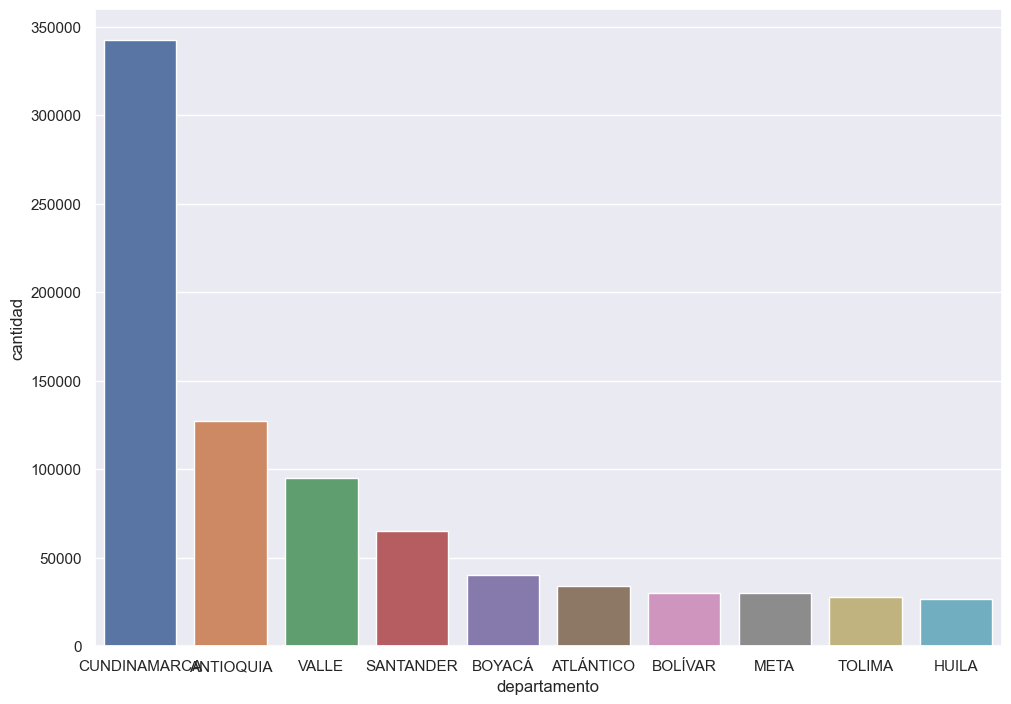

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="departamento", y="cantidad", data=df_departamento)
# ax.set(xlabel = None)


Municipality with the most cases

In [44]:
df["municipio"].value_counts()


BOGOTÁ D.C. (CT)         58548
MEDELLÍN (CT)            25142
CALI (CT)                22048
BUCARAMANGA (CT)         11992
VILLAVICENCIO (CT)       11453
                         ...  
CEPITÁ                       3
SÁCAMA                       3
BOJAYÁ                       2
ZAPAYÁN                      2
SAN JACINTO DEL CAUCA        2
Name: municipio, Length: 1023, dtype: int64

In [45]:
df_municipio = df.groupby("municipio").sum()
df_municipio = df_municipio.reset_index()
df_municipio = df_municipio.sort_values(by="cantidad", ascending=False).head(10)
df_municipio

C:\Users\wmigu\AppData\Local\Temp\ipykernel_14624\2132925481.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_municipio = df.groupby("municipio").sum()


,municipio,cantidad
99,BOGOTÁ D.C. (CT),282009
510,MEDELLÍN (CT),72302
129,CALI (CT),58451
106,BUCARAMANGA (CT),21700
995,VILLAVICENCIO (CT),20893
150,CARTAGENA (CT),20129
83,BARRANQUILLA (CT),19455
607,PASTO (CT),17468
853,SOACHA,16962
249,CÚCUTA (CT),16814


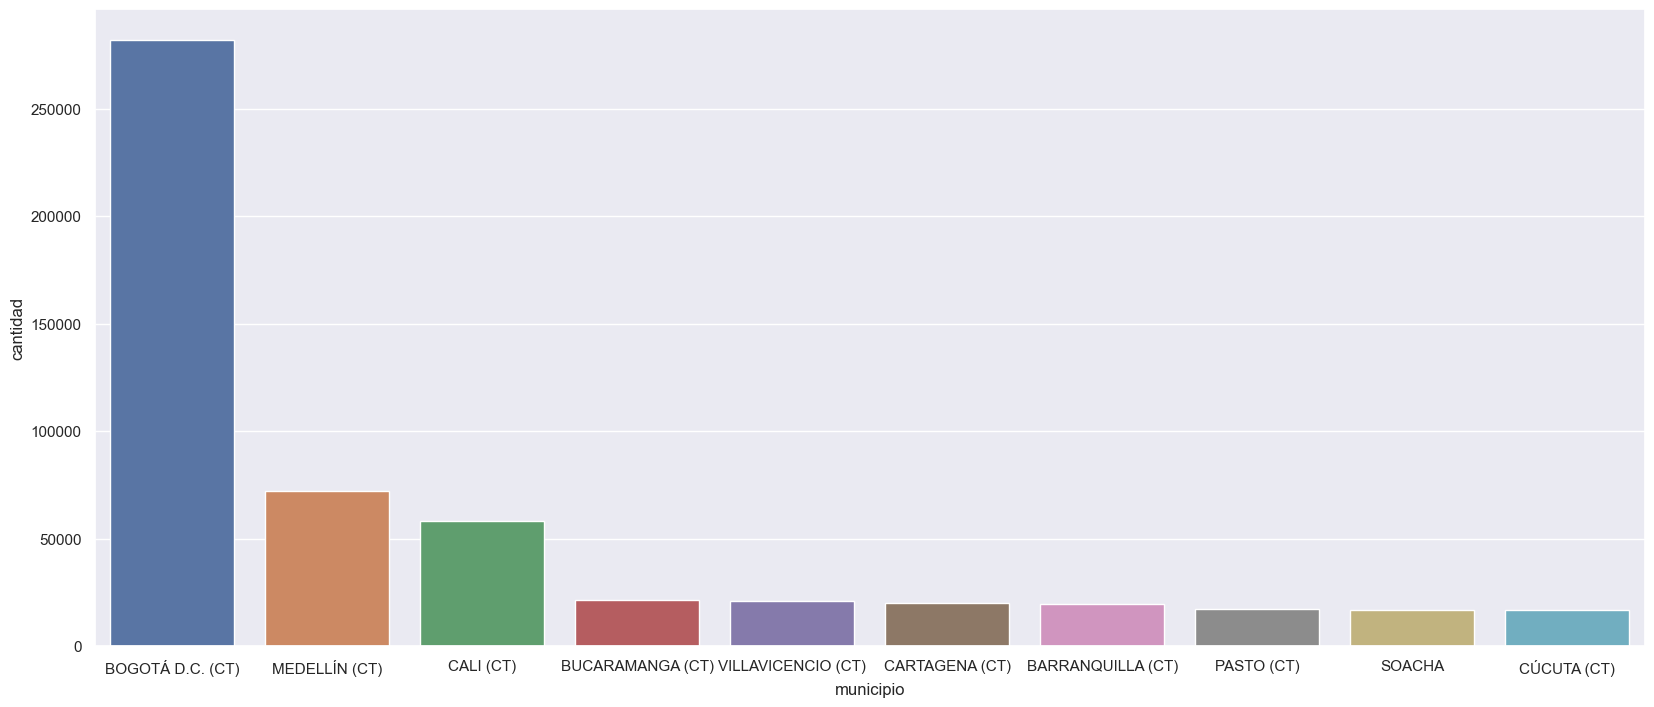

In [48]:
fig, ax = plt.pyplot.subplots(figsize=(20, 8.27))
ax = sns.barplot(x="municipio", y="cantidad", data=df_municipio)


Gun type with the most cases

In [49]:
df["armas_medios"].value_counts()

CONTUNDENTES                   280171
SIN EMPLEO DE ARMAS            169055
NO REPORTADO                    71930
ARMA BLANCA / CORTOPUNZANTE     40931
NO REPORTA                       4421
ESCOPOLAMINA                     3863
ARMA DE FUEGO                    2710
CORTOPUNZANTES                   1167
CORTANTES                        1138
PUNZANTES                         334
-                                   1
Name: armas_medios, dtype: int64

In [51]:
df_armas = df.groupby("armas_medios").sum()
df_armas = df_armas.reset_index()
df_armas = df_armas.sort_values(by="cantidad", ascending=False).head(10)
df_armas

C:\Users\wmigu\AppData\Local\Temp\ipykernel_14624\3093919104.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_armas = df.groupby("armas_medios").sum()


,armas_medios,cantidad
3,CONTUNDENTES,439881
10,SIN EMPLEO DE ARMAS,379938
8,NO REPORTADO,149687
1,ARMA BLANCA / CORTOPUNZANTE,47863
6,ESCOPOLAMINA,7294
7,NO REPORTA,4972
2,ARMA DE FUEGO,2845
5,CORTOPUNZANTES,1195
4,CORTANTES,1178
9,PUNZANTES,336


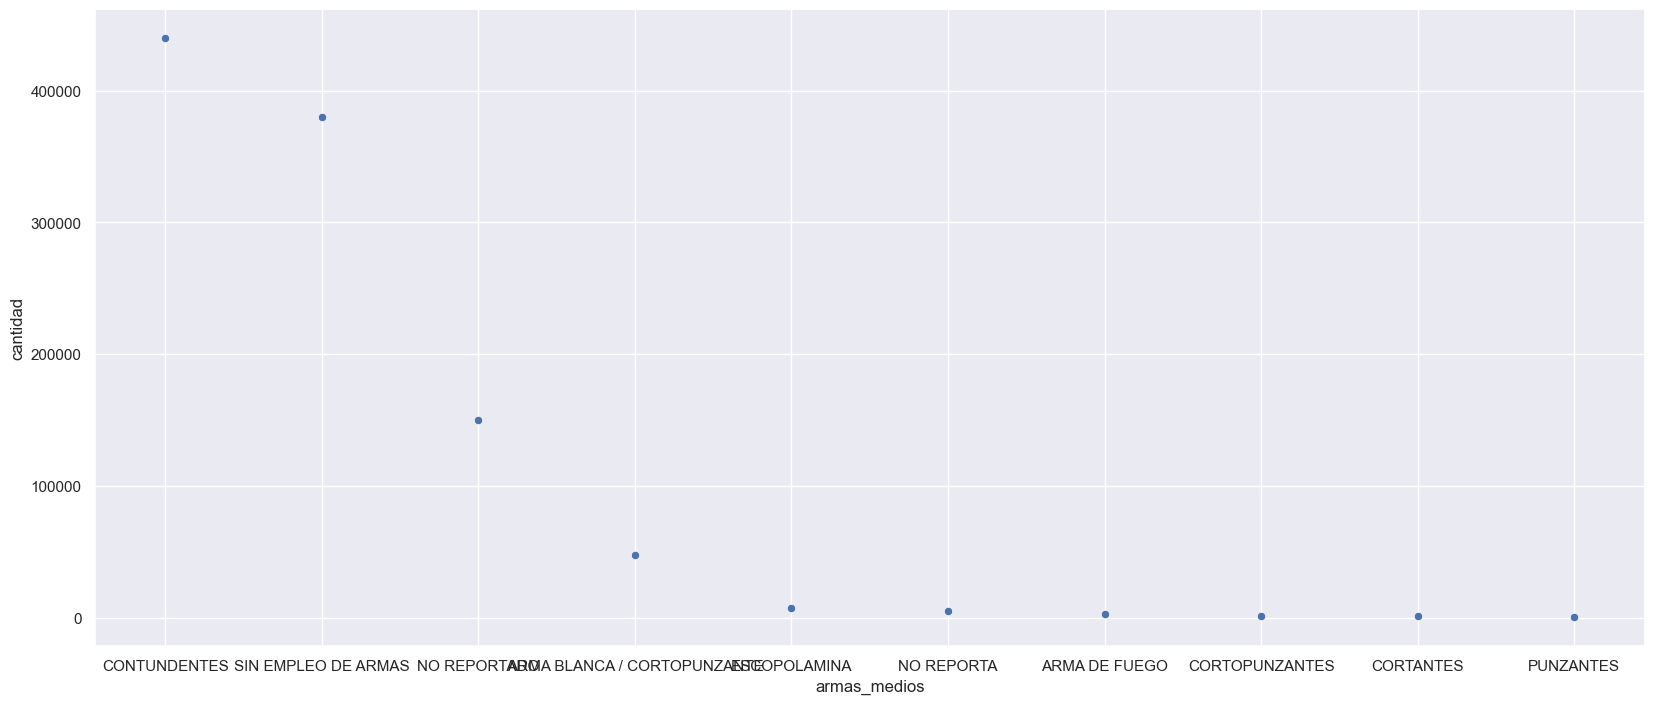

In [52]:
fig, ax = plt.pyplot.subplots(figsize=(20, 8.27))
ax = sns.scatterplot(x="armas_medios", y="cantidad", data=df_armas)

Relationship between genre and department

In [57]:
df["genero"].value_counts()


FEMENINO        437931
MASCULINO       137257
NO REPORTA         294
NO REPORTADO       232
-                    7
Name: genero, dtype: int64

In [59]:
df_genre = df.dropna(subset=["genero"])
df_genre = df_genre.groupby(["genero", "departamento"]).sum()
df_genre = df_genre.reset_index()
df_genre = df_genre.sort_values(by="cantidad", ascending=False).head(10)
df_genre

C:\Users\wmigu\AppData\Local\Temp\ipykernel_14624\3396870951.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_genre = df_genre.groupby(["genero", "departamento"]).sum()


,genero,departamento,cantidad
15,FEMENINO,CUNDINAMARCA,256040
4,FEMENINO,ANTIOQUIA,100806
48,MASCULINO,CUNDINAMARCA,86466
33,FEMENINO,VALLE,76704
30,FEMENINO,SANTANDER,53460
8,FEMENINO,BOYACÁ,33345
6,FEMENINO,ATLÁNTICO,27705
37,MASCULINO,ANTIOQUIA,26405
22,FEMENINO,META,25194
7,FEMENINO,BOLÍVAR,24083


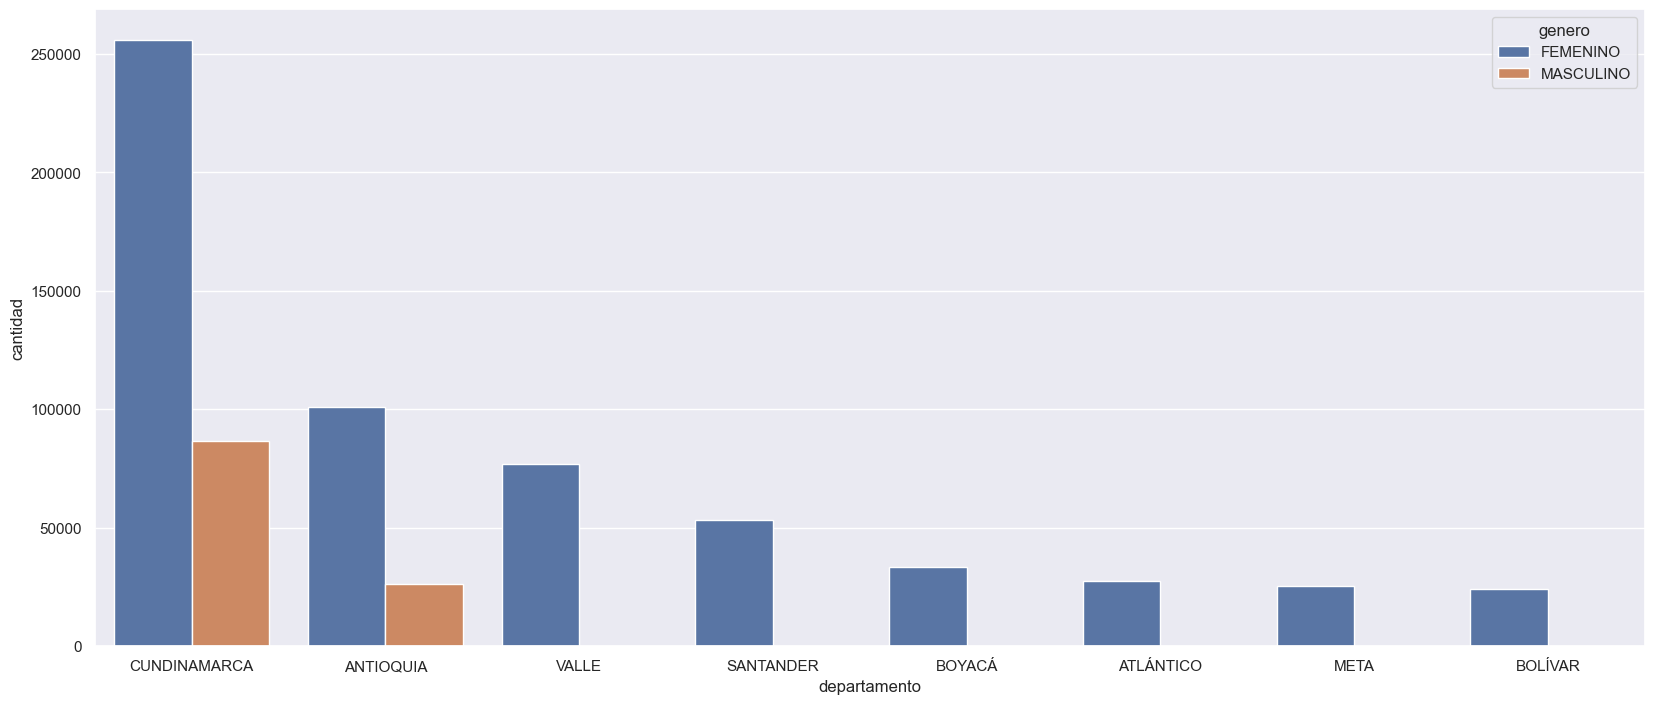

In [62]:
fig, ax = plt.pyplot.subplots(figsize=(20, 8.27))
ax = sns.barplot(x="departamento", y="cantidad", hue="genero", data=df_genre)


Relationship between age group and genre

In [63]:
df["grupo_etario"].value_counts()

ADULTOS         503613
ADOLESCENTES     35551
MENORES          34439
NO REPORTADO      2118
Name: grupo_etario, dtype: int64

In [66]:
df_age = df.dropna(subset=["genero"])
df_age = df_age.groupby(["grupo_etario", "genero"]).sum()
df_age = df_age.reset_index()
df_age = df_age.sort_values(by="cantidad", ascending=False).head(10)
df_age


C:\Users\wmigu\AppData\Local\Temp\ipykernel_14624\4287888986.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_age = df_age.groupby(["grupo_etario", "genero"]).sum()


,grupo_etario,genero,cantidad
2,ADULTOS,FEMENINO,762880
3,ADULTOS,MASCULINO,175368
0,ADOLESCENTES,FEMENINO,29893
6,MENORES,MASCULINO,26630
5,MENORES,FEMENINO,24308
1,ADOLESCENTES,MASCULINO,13026
9,NO REPORTADO,FEMENINO,1642
10,NO REPORTADO,MASCULINO,873
11,NO REPORTADO,NO REPORTA,299
12,NO REPORTADO,NO REPORTADO,243


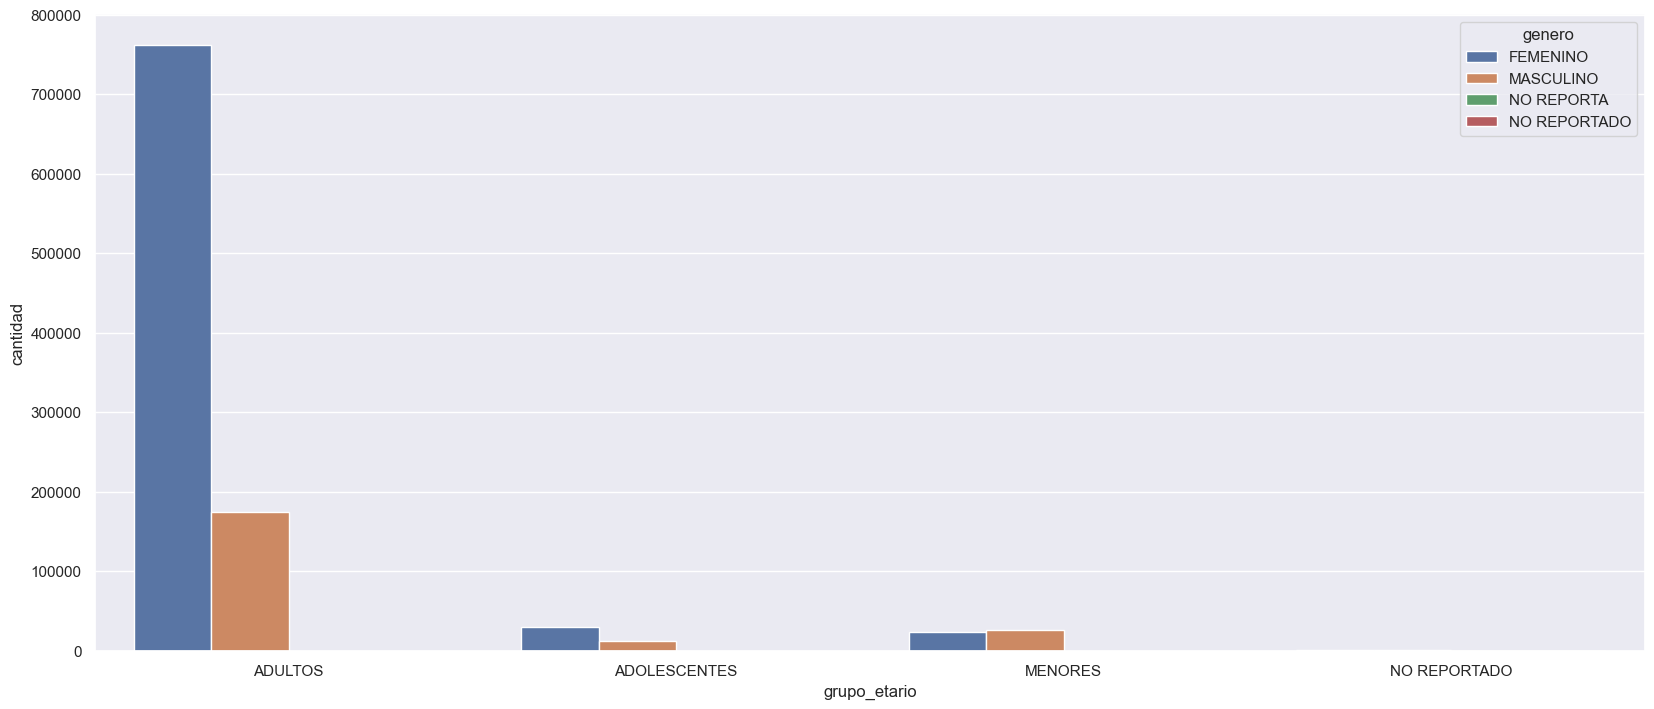

In [67]:
fig, ax = plt.pyplot.subplots(figsize=(20, 8.27))
ax = sns.barplot(x="grupo_etario", y="cantidad", hue="genero", data=df_age)
